In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 선형 모델을 위한 데이터 변환

### 선형회귀모델의 가정
    
- 선형성(X와 y)
- 오차의 정규성, 독립성, 등분산성

#### 피처들(X)이나 타깃(y)의 분포가 정규분포 형태인 것을 선호

#### 중요 피처들이나 타깃값의 분포도가 심하게 비대칭인 경우
- 선형회귀모델을 적용하기 위해 데이터에 대한 변환 작업 진행이 일반적

### 피처들(X)의 변환

1. 표준화 : StandardScaler 클래스


2. 정규화 : MinMaxScaler 클래스


3. 스케일링/정규화를 수행한 데이터세트에 다시 다항특성을 적용하여 변환
    - 스케일링/정규화를 했으나 예측성능에 향상이 없을 경우
    
    
4. 비대칭분포(오른쪽으로 꼬리가 긴 분포)의 경우 로그 변환

### 타깃(y) 값 변환

: 주로 비대칭인 경우 로그 변환

## 보스톤 주택가격 예측

In [34]:
import pandas as pd
df = pd.read_csv('Boston.csv')

### 데이터 준비

### 주요 피처들의 분포

In [13]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [36]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

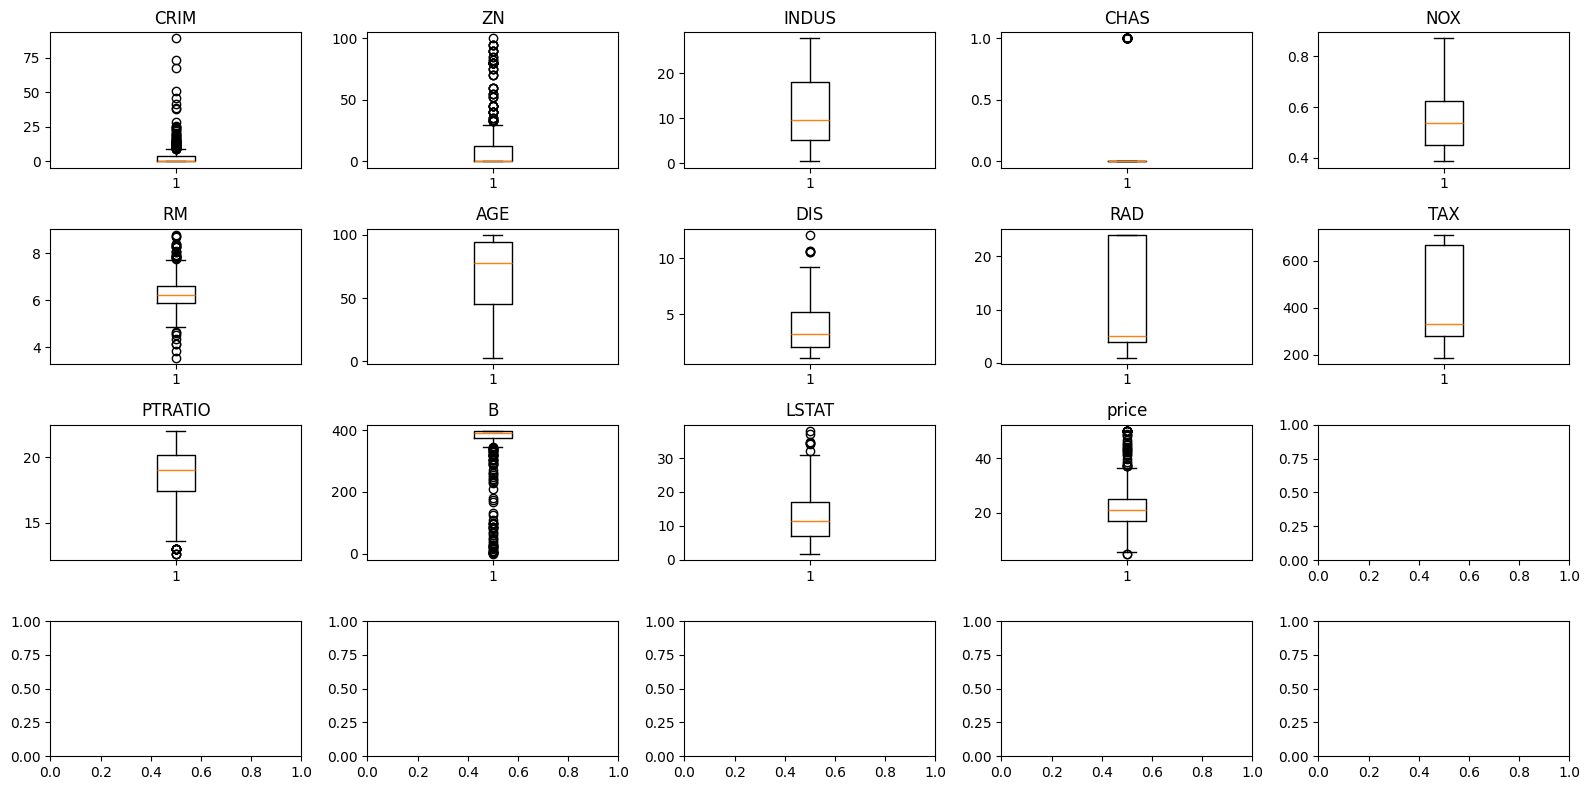

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

ftr_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price']
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(16,8))
axs = axs.flatten()

for i, ftr in enumerate(ftr_names):
    ax = axs[i]
    ax.boxplot(df[ftr])
    ax.set_title(ftr)
plt.tight_layout()
plt.show()

#### 규제가 있는 회귀모델 적용 함수 get_linear_reg_eval()

: 규제회귀 Ridge, Lasso, ElasticNet을 지정하여 해당 규제 모델을 학습하고 예측성능 출력

In [38]:
X = df.drop('price', axis=1)
y = df['price']

In [43]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import (mean_squared_error, 
                            mean_absolute_error, 
                            mean_squared_log_error,
                            r2_score)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, shuffle=True, random_state=2020158011)

In [47]:
import numpy as np

In [48]:
ridge = Ridge(alpha=10)
ridge = get_model_fit_predict(ridge, X_train, X_test, y_train, y_test)

Ridge(alpha=10), 
RMSE:5.317, MAE:3.651,  R20.740


In [49]:
def get_linear_regr_model(model_name, alphas, X, y, feature_names):
    coef_df = pd.DataFrame(index=feature_names)
    for alpha in alphas:
        if model_name == 'Ridge':
            model = Ridge(alpha=alpha)
        elif model_name == 'Lasso':
            model = Lasso(alpha=alpha)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=alpha, l1_ratio=0.7)
        print(f'## {model}')
        reg_cv_modeling(model, X, y)
        print('------------------\n')
        model.fit(X,y)
        coef_df[f'alpha={alpha}'] = model.coef_
    return coef_df
def get_model_fit_predict(model, X_train, X_test, y_train, y_test, is_log= False):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if is_log:
        y_test = np.expm1(y_test)
        y_pred = np.expm1(y_pred)
        text='log변환'
    else:
        text=''
    print(f'{model}, {text}')
    print_eval_regr_scores(y_test, y_pred, is_log=is_log)
    return model
def print_eval_regr_scores(y,pred, is_log=False):
    rmse_val = rmse(y, pred)
    mae = mean_absolute_error(y, pred) 
    r2 = r2_score(y, pred)
    if is_log:
        rmsle = mean_squared_log_error(y, pred)
        print(f'RMSE:{rmse_val:.3f}, MAE:{mae:.3f}, RMSLE:{rmsle:.3f}, R2{r2:.3f}')
    else:
        print(f'RMSE:{rmse_val:.3f}, MAE:{mae:.3f},  R2{r2:.3f}')
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y,pred))

def print_eval_regr_scores(y,pred, is_log=False):
    rmse_val = rmse(y, pred)
    mae = mean_absolute_error(y, pred) 
    r2 = r2_score(y, pred)
    if is_log:
        rmsle = mean_squared_log_error(y, pred)
        print(f'RMSE:{rmse_val:.3f}, MAE:{mae:.3f}, RMSLE:{rmsle:.3f}, R2{r2:.3f}')
    else:
        print(f'RMSE:{rmse_val:.3f}, MAE:{mae:.3f},  R2{r2:.3f}')

def get_model_fit_predict(model, X_train, X_test, y_train, y_test, is_log= False):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if is_log:
        y_test = np.expm1(y_test)
        y_pred = np.expm1(y_pred)
        text='log변환'
    else:
        text=''
    print(f'{model}, {text}')
    print_eval_regr_scores(y_test, y_pred, is_log=is_log)
    return model
def reg_coeff_plot(model,ftr_names):
    coef = pd.DataFrame(data=np.round(model.coef_, 5),
                        index=ftr_names, columns=['Coef'])
    coef_s = coef.sort_values(by='Coef', ascending=False)
    sns.barplot(x=coef_s['Coef'], y=coef_s.index)
    plt.xlabel('coefficient')
    plt.ylabel('features')
    plt.show()
    print(f'회귀계수\n{coef}')


def get_residual(y_test, y_pred, top_n=10, sort= False):
    df = pd.DataFrame(y_test.values, columns=['Real_y'])
    df['Pred_y'] = np.round(y_pred)
    df['abs(Residual)'] = np.abs(df['Real_y'] - df['Pred_y'])
    if sort:
        print('Sorted')
        df = df.sort_values(by = 'abs(Residual)', ascending=False)
    return df[:top_n]

In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [28]:
def reg_cv_modeling(model, X, y, cv=5, scoring='neg_mean_squared_error'):
    scores = cross_val_score(ridge2, X_train, y_train, cv=5, scoring=scoring)
    rmses = np.sqrt(scores*(-1))
    avg_rmse = np.mean(rmses)
    print(f'{model}:{cv}-fold CV')
    print(f'Negative MSE:{np.round(scores,3)}')
    print(f'RMSEs: {np.round(rmses)}, Average RMSE: {avg_rmse:.4f}')

### 데이터 변환을 위한 함수 get_scaled_data() 작성

변환 방식은

1. 표준화(Standard)
2. 최대값/최소값 정규화(MinMax)
3. 로그변환(Log)

####  데이터 변환을 위한 함수

In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [51]:
scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [53]:
scaler.fit(X_train)
scaler.transform(X_train)

array([[ 0.55496297, -0.48053021,  1.01575599, ...,  0.83361795,
         0.43112085,  1.74897329],
       [-0.3957894 ,  0.59179748, -0.91701036, ...,  0.27894051,
         0.43112085, -1.0635022 ],
       [-0.39913978,  3.37984947, -1.44837513, ..., -0.22951381,
         0.42002105, -1.13355868],
       ...,
       [-0.39510665, -0.48053021, -1.12868039, ..., -0.27573693,
         0.37710948, -0.54975473],
       [-0.39552156,  0.42022505, -0.80314648, ..., -0.73796813,
         0.3975926 , -0.45926512],
       [-0.39215683, -0.48053021, -0.97102272, ...,  0.04782491,
         0.41109544, -0.6037566 ]], shape=(404, 13))

In [56]:
min_max_scaler.fit(X_train)
min_max_scaler.transform(X_train)

array([[8.97344795e-02, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 1.00000000e+00, 6.29966887e-01],
       [3.60470169e-04, 2.50000000e-01, 1.61290323e-01, ...,
        6.80851064e-01, 1.00000000e+00, 9.82339956e-02],
       [4.55224255e-05, 9.00000000e-01, 2.78592375e-02, ...,
        5.63829787e-01, 9.97554087e-01, 8.49889625e-02],
       ...,
       [4.24651169e-04, 0.00000000e+00, 1.08137830e-01, ...,
        5.53191489e-01, 9.88098240e-01, 1.95364238e-01],
       [3.85648004e-04, 2.10000000e-01, 1.89882698e-01, ...,
        4.46808511e-01, 9.92611831e-01, 2.12472406e-01],
       [7.01944561e-04, 0.00000000e+00, 1.47727273e-01, ...,
        6.27659574e-01, 9.95587271e-01, 1.85154525e-01]], shape=(404, 13))

In [64]:
np.log1p(y_test)

47     2.867899
263    3.465736
188    3.427515
334    3.077312
468    3.000720
         ...   
491    2.681022
452    2.839078
136    2.912351
295    3.387774
499    2.917771
Name: price, Length: 102, dtype: float64

In [66]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

np.log1p(y_pred)

C:\Users\user\AppData\Local\Temp\ipykernel_512\1400015082.py:6: RuntimeWarning: invalid value encountered in log1p
  np.log1p(y_pred)


array([ 2.93984493,  3.56659719,  3.49554493,  3.12896892,  2.86391475,
        2.97853695,  3.33394626,  3.22106793,  2.61826268,  3.07629857,
        2.167262  ,  2.52685606,  3.65364512,  3.50485275,  3.07951936,
               nan,  3.60306196,  3.43974138,  3.39409532,  3.69967427,
        3.03171621,  2.65733472,  3.07956951,  3.07482253,  3.10725865,
        3.25795077,  3.2562564 ,  2.62912993,  3.36979238,  3.39606049,
        1.80707588,  2.82266508,  2.51611279,  3.36788179,  3.25782334,
       -0.95563746,  2.38698591,  3.77318347,  2.4209818 ,  3.07455089,
        3.07407895,  3.50699276,  3.08077295,  1.91278264,  3.47670663,
        3.32099379,  3.22495935,  2.9339486 ,  3.04165081,  3.11014184,
        3.78991442,  2.71258308,  3.05173544,  3.3866039 ,  3.18192796,
        3.46437976,  2.97360986,  2.90659228,  2.80010174,  3.62751971,
        2.60459082,  2.62808184,  2.77458637,  3.23868448,  2.86907852,
        3.51101866,  1.83265454,  3.16592383,  3.09952569,  3.08

# 데이터 변환방법에 따른 회귀모델의 RMSE

- Ridge 회귀
- alphas = [0.1, 1, 10, 100]

In [ ]:
qqqqqq

-------------------------------------------------